## Importing Necessory Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# !pip install nltk
#!pip install wordcloud

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/muhliscm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading the data

In [7]:
ls

01_EDA.ipynb                  Dockerfile    README.md
01_Model_building_copy.ipynb  images/       requirements.txt
01_Model_building.ipynb       LICENSE       spam.csv
app.py                        model.pkl     vectorizer.pkl
data_preprocessed.csv         pipeline.pkl  website/


In [8]:
original_df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [9]:
df = original_df.copy()

In [10]:
# first 5 data
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# total size of the data set
print("Number of Rows in data: ", df.shape[0])
print("Number of columns in data: ", df.shape[1])

Number of Rows in data:  5572
Number of columns in data:  5


In [12]:
# checking basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
# Checking for null values
df.isnull().sum()[df.isnull().sum() > 0]

Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [14]:
df[df['Unnamed: 2'].notnull()]["Unnamed: 2"]

95                                            PO Box 5249
281      the person is definitely special for u..... B...
444      HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...
671      wanted to say hi. HI!!!\" Stop? Send STOP to ...
710       this wont even start........ Datz confidence.."
899                                           PO Box 5249
1038                                                   GN
1127                                             .;-):-D"
1266    just been in bedbut mite go 2 thepub l8tr if u...
1384     bt not his girlfrnd... G o o d n i g h t . . .@"
1428                                        I'll come up"
1559     don't miss ur best life for anything... Gud n...
1637     just as a shop has to give a guarantee on wha...
1669     But at d end my love compromised me for every...
1675     the toughest is acting Happy with all unspoke...
1936                                  smoke hella weed\""
1937                       \" not \"what i need to do.\""
1997    JUST G

In [15]:
df[df['Unnamed: 3'].notnull()]["Unnamed: 3"]

95                            MK17 92H. 450Ppw 16"
281                               why to miss them
899                           MK17 92H. 450Ppw 16"
1038                                            GE
2170      U NO THECD ISV.IMPORTANT TOME 4 2MORO\""
2255      i wil tolerat.bcs ur my someone..... But
3145     ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""
3506            whoever is the KING\"!... Gud nyt"
3525                                TX 4 FONIN HON
4668              \"OH No! COMPETITION\". Who knew
5048                                            GE
5081                                IåÕL CALL U\""
Name: Unnamed: 3, dtype: object

In [16]:
df[df['Unnamed: 4'].notnull()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


### Data Cleaning

In [17]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [18]:
df.sample(5)

,v1,v2
3950,ham,Hi dude hw r u da realy mising u today
1986,ham,S..antha num corrct dane
3582,ham,I sent your maga that money yesterday oh.
890,ham,Why do you ask princess?
2454,ham,Left dessert. U wan me 2 go suntec look 4 u?


In [19]:
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

In [20]:
df.sample(5)

,target,text
2939,spam,You have 1 new message. Please call 08712400200.
2794,ham,How will I creep on you now? ;_;
154,ham,"You are everywhere dirt, on the floor, the win..."
1631,ham,We not watching movie already. Xy wants 2 shop...
2228,ham,Those were my exact intentions


In [21]:
df["target"].value_counts()/len(df["target"])

target
ham     0.865937
spam    0.134063
Name: count, dtype: float64

** it is an imbalanced dataset

In [22]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
# checking for duplicated values
df.duplicated().sum()

403

In [25]:
df[df.duplicated()]

,target,text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [26]:
# dropping duplicates
df.drop_duplicates(keep='first', inplace=True)

In [27]:
df.duplicated().sum()

0

### EDA

In [28]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [29]:
df["target"].value_counts()/len(df["target"])

target
0    0.87367
1    0.12633
Name: count, dtype: float64

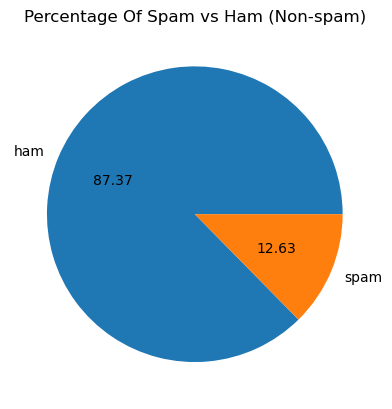

In [30]:
plt.title("Percentage Of Spam vs Ham (Non-spam)")
plt.pie(df["target"].value_counts(), labels=["ham", 'spam'], autopct='%0.2f')
plt.savefig("spam_vs_ham.png")
plt.show()

#### Data Is Imbalanced

In [31]:
# finding number of characters, words and sentences in dataset
df["num_char"] = df["text"].apply(len)

In [32]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
df["text"].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [34]:
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [35]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
df["text"].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [37]:
df["num_sentence"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
df[["num_char", "num_words", "num_sentence"]].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [40]:
# ham messages
df[df["target"] == 0][["num_char", "num_words", "num_sentence"]].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [41]:
# Spam messages
df[df["target"] == 1][["num_char", "num_words", "num_sentence"]].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


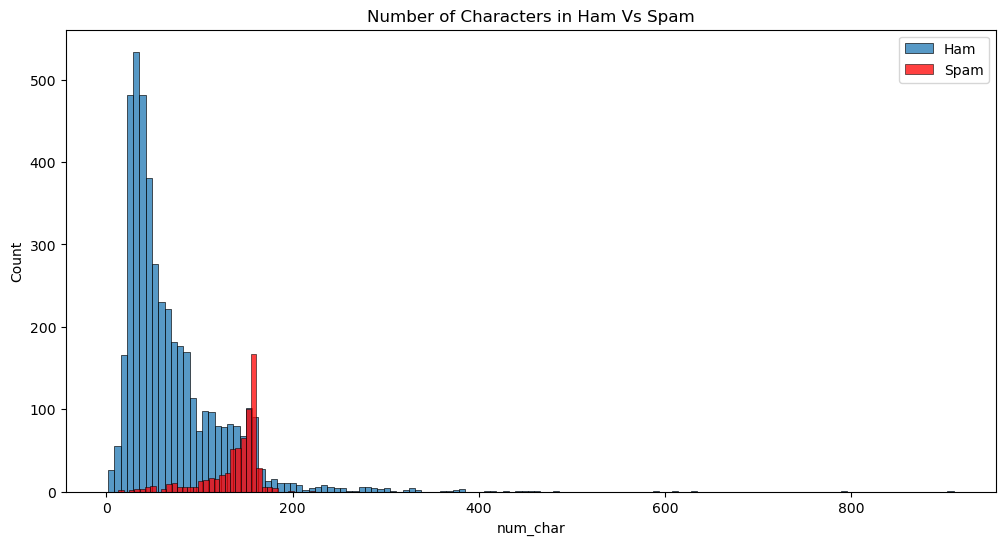

In [98]:
plt.figure(figsize=(12, 6))
plt.title("Number of Characters in Ham Vs Spam")
sns.histplot(df[df["target"] == 0]["num_char"], label="Ham")
sns.histplot(df[df["target"] == 1]["num_char"], color='red', label="Spam")
plt.savefig("Number of Characters in Ham Vs Spam.png")
plt.legend()

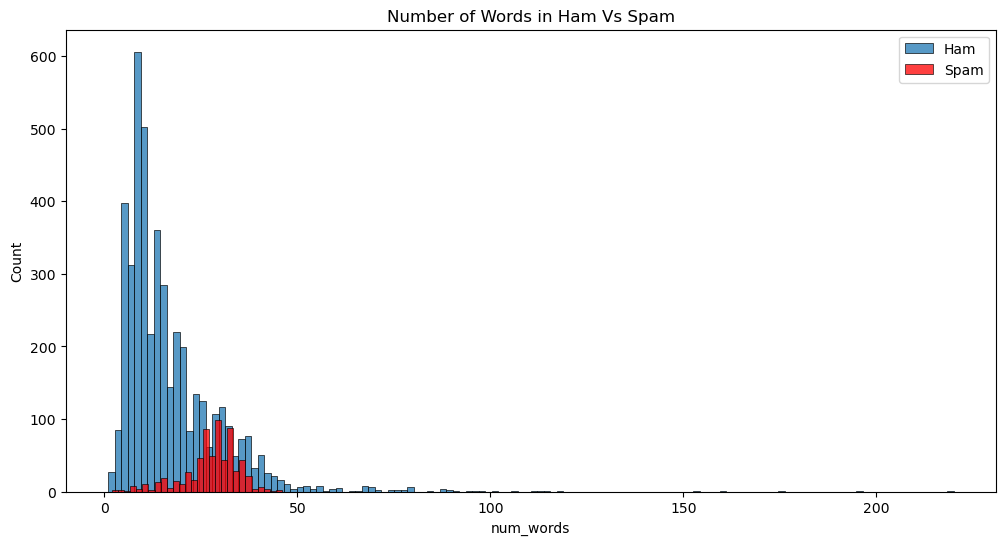

In [43]:
plt.figure(figsize=(12, 6))
plt.title("Number of Words in Ham Vs Spam")
sns.histplot(df[df["target"] == 0]["num_words"], label="Ham")
sns.histplot(df[df["target"] == 1]["num_words"], color='red', label="Spam")
plt.legend()

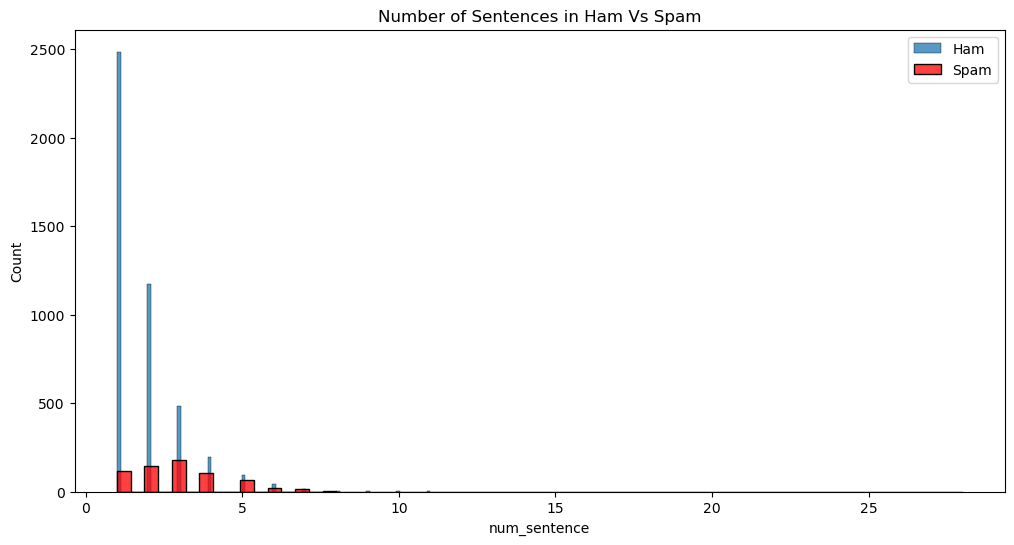

In [44]:
plt.figure(figsize=(12, 6))
plt.title("Number of Sentences in Ham Vs Spam")
sns.histplot(df[df["target"] == 0]["num_sentence"], label="Ham")
sns.histplot(df[df["target"] == 1]["num_sentence"], color='red', label="Spam")
plt.legend()

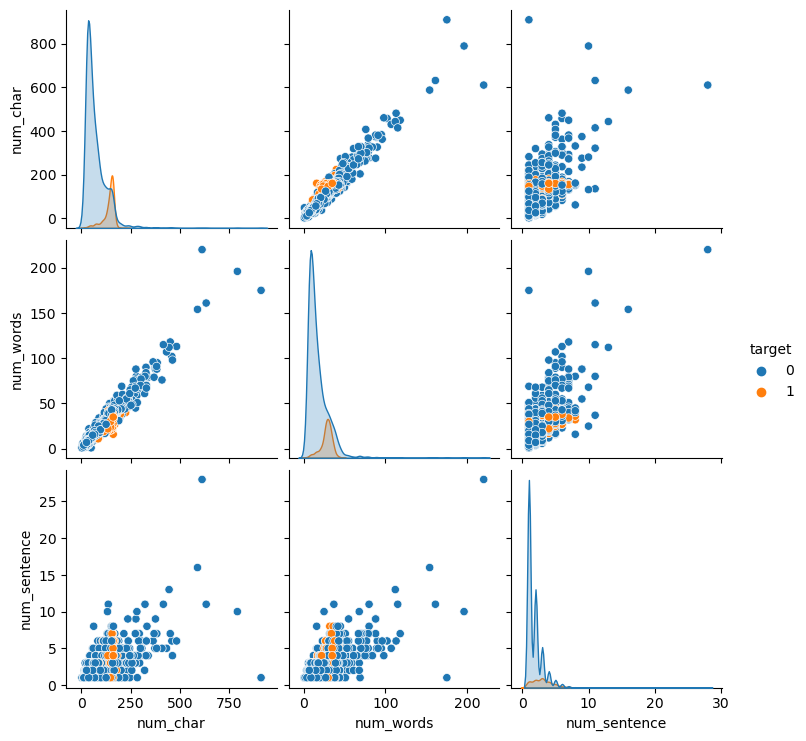

In [45]:
sns.pairplot(df, hue="target")
plt.show()

In [46]:
numeric_df = df.select_dtypes(include=['number'])

<Axes: >

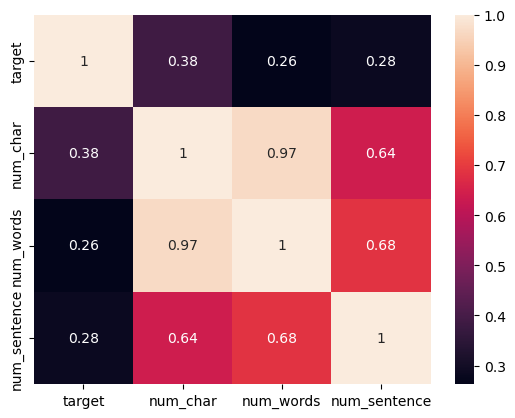

In [47]:
sns.heatmap(numeric_df.corr(), annot=True)

We can see than number of characters have more correlation with target. Also num_char,num_word and num_sentence are highly correlated Multicollinearity. So we only use one column which is num_char

### Text Preprocessing

In [48]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
from nltk.stem.porter import PorterStemmer
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
ps = PorterStemmer()

In [51]:
def transformation(text):
    # lower text
    text = text.lower()
    # convert into words
    text = nltk.word_tokenize(text)

    # removing special characters
    y = []
    for str_ in text:
        if str_.isalnum():
            y.append(str_)

    text = y.copy()
    y.clear()

    # removing stop words and punctuation
    for str_ in text:
        if str_ not in stopwords.words('english') and str_ not in string.punctuation:
            y.append(str_)

    text = y.copy()
    y.clear()

    # stemming
    for str_ in text:
        y.append(ps.stem(str_))

    return " ".join(y)

In [52]:
sent = "Hello How are your 889u9w84u5899...#"

In [53]:
print(transformation(df["text"][0]))

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [54]:
df["transformed_text"] = df["text"].apply(transformation)

In [55]:
df.head()

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
# wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400,
                      min_font_size=10, background_color='white')

In [57]:
spam_wc = wordcloud.generate(
    df[df["target"] == 1]['transformed_text'].str.cat(sep=" "))

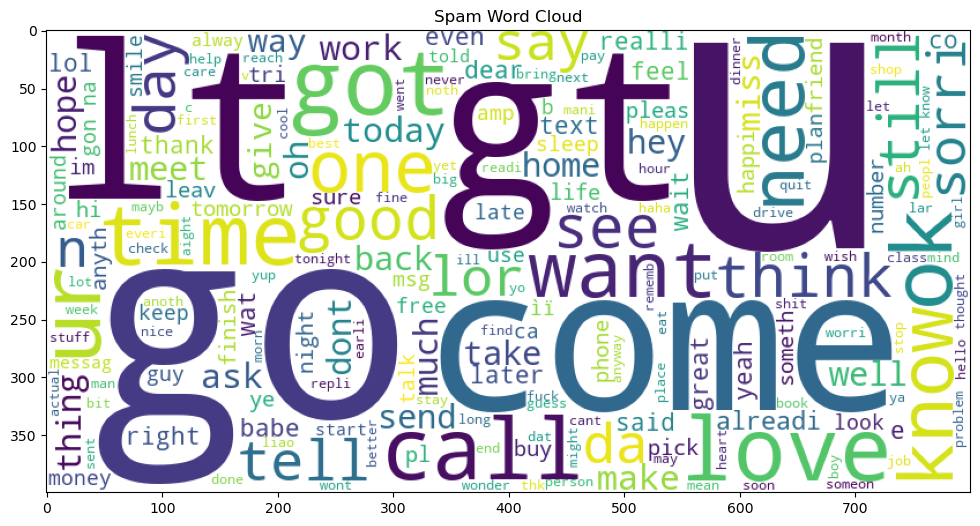

In [99]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.title("Spam Word Cloud")
plt.savefig("Spam Word Cloud.png")
plt.show()

In [59]:
ham_wc = wordcloud.generate(
    df[df["target"] == 0]['transformed_text'].str.cat(sep=" "))

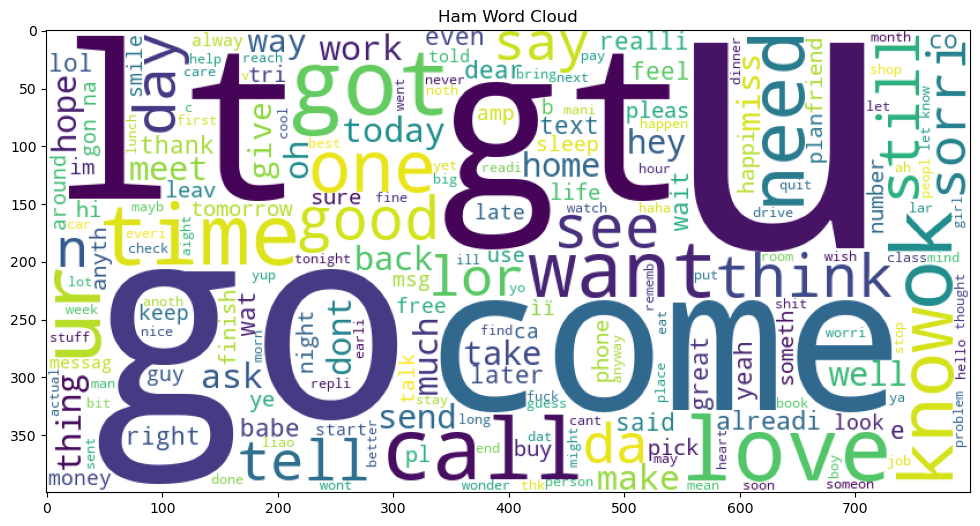

In [100]:

plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)
plt.title('Ham Word Cloud')
plt.savefig('Ham Word Cloud.png')
plt.show()

In [61]:
# finding most frequent words in spam
spam_words = []
for msg in df[df["target"] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [62]:
len(spam_words)

9939

In [63]:
from collections import Counter
most_freq_spam_words = Counter(spam_words).most_common(30)
most_freq_spam_words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [64]:
# finding most frequent words in ham
ham_words = []
for msg in df[df["target"] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_words.append(word)

In [65]:
len(spam_words)

9939

In [66]:
most_freq_ham_words = Counter(ham_words).most_common(30)
most_freq_ham_words

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

In [67]:
spam_word_df = pd.DataFrame(most_freq_spam_words)
spam_word_df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


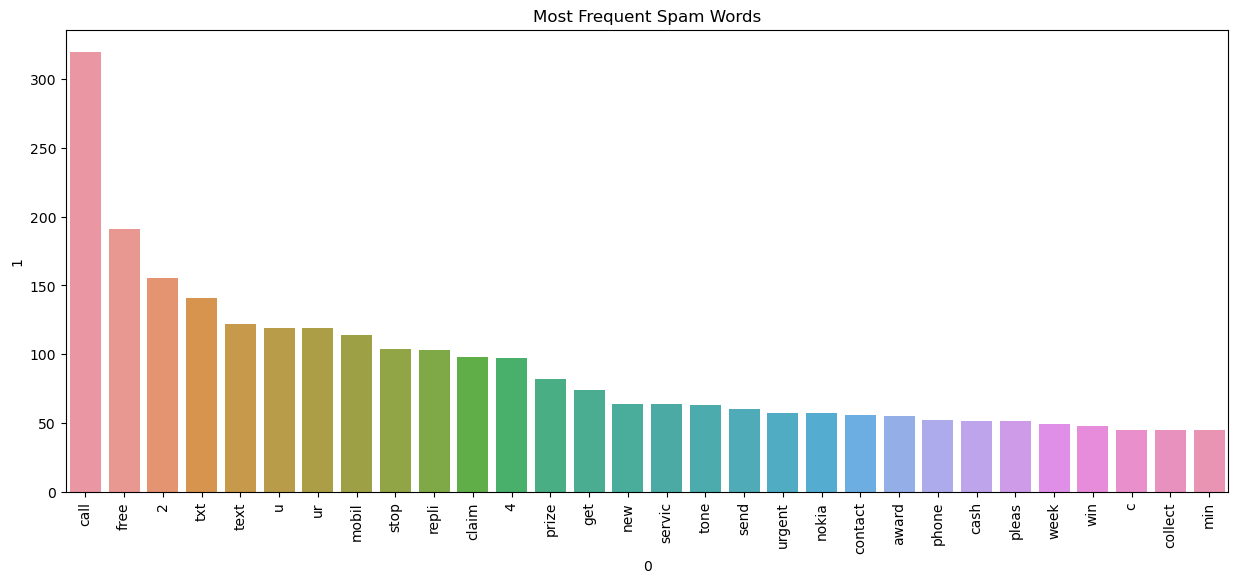

In [68]:

plt.figure(figsize=(15, 6))
plt.title("Most Frequent Spam Words")
sns.barplot(data=spam_word_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [69]:
ham_word_df = pd.DataFrame(most_freq_ham_words)
ham_word_df

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


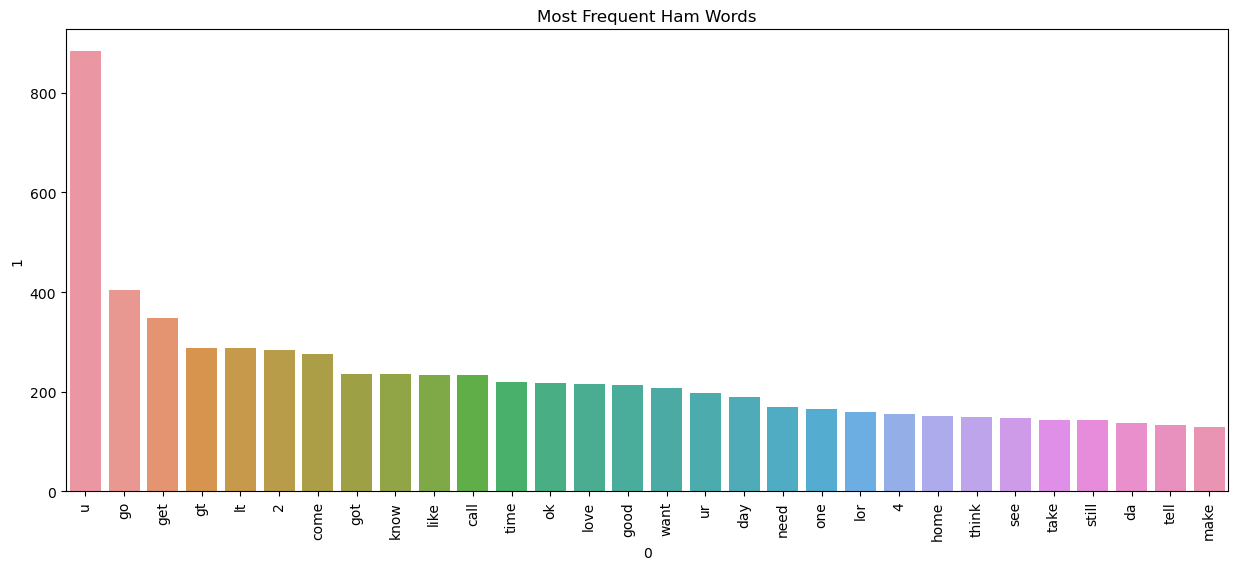

In [70]:
plt.figure(figsize=(15, 6))
plt.title("Most Frequent Ham Words")
sns.barplot(data=ham_word_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
df.to_csv("data_preprocessed.csv")

## Model Building

In [72]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [74]:
X = cv.fit_transform(df['transformed_text']).toarray()
y = df["target"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42)

In [76]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [77]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [78]:
y_pred_gnb = gnb.predict(X_test)

In [79]:
print("accuracy_score: ", accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print("precision_score: ", precision_score(y_test, y_pred_gnb))

accuracy_score:  0.8684719535783365
[[772 117]
 [ 19 126]]
precision_score:  0.5185185185185185


In [80]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [81]:
y_pred_mnb = mnb.predict(X_test)

In [82]:
print("accuracy_score: ", accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print("precision_score: ", precision_score(y_test, y_pred_mnb))

accuracy_score:  0.9738878143133463
[[872  17]
 [ 10 135]]
precision_score:  0.8881578947368421


In [83]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [84]:
y_pred_bnb = bnb.predict(X_test)

In [85]:
print("accuracy_score: ", accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print("precision_score: ", precision_score(y_test, y_pred_bnb))

accuracy_score:  0.9661508704061895
[[885   4]
 [ 31 114]]
precision_score:  0.9661016949152542


### Using TF IDF

In [86]:
tfidf = TfidfVectorizer()

In [87]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df["target"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42)

In [89]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [90]:
y_pred_gnb = gnb.predict(X_test)

In [91]:
print("accuracy_score: ", accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print("precision_score: ", precision_score(y_test, y_pred_gnb))

accuracy_score:  0.8636363636363636
[[772 117]
 [ 24 121]]
precision_score:  0.5084033613445378


In [92]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [93]:
y_pred_mnb = mnb.predict(X_test)

In [94]:
print("accuracy_score: ", accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print("precision_score: ", precision_score(y_test, y_pred_mnb))

accuracy_score:  0.9613152804642167
[[888   1]
 [ 39 106]]
precision_score:  0.9906542056074766


In [95]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [96]:
y_pred_bnb = bnb.predict(X_test)

In [97]:
print("accuracy_score: ", accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print("precision_score: ", precision_score(y_test, y_pred_bnb))

accuracy_score:  0.9661508704061895
[[885   4]
 [ 31 114]]
precision_score:  0.9661016949152542
